In [1]:
import numpy as np
import pImpactR as impact
from copy import deepcopy as copy
import matplotlib.pyplot as plt
from math import ceil
import os

In [2]:
np.set_printoptions(formatter={'float': lambda x: format(x, '1.2E')})
NTURN = [128,256,512,1024,2048]
nTurn = NTURN[0]
nCore_y = 8
nCore_z = 4

nx = 100
NL_t  = 0.4
NL_c  = 0.01
NL_nu = 0.3
NL_L  = 1.8
pipe_radius = 0.02*np.sqrt(2.0)

In [3]:
alfx = np.tan(np.pi*NL_nu)
betx = NL_L/np.sin(2.0*np.pi*NL_nu)

# 1. Preparation

### 1.1 lattice matching

In [4]:
beam_wSC, lattice_wSC = impact.readInputFile('test_IOTA.in')
beam_nSC, lattice_nSC = impact.readInputFile('test_IOTA.noSC.in')

reading ImpactZ input file (test_IOTA.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done
reading ImpactZ input file (test_IOTA.noSC.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..........

In [5]:
lattice_wSC = [ item for item in lattice_wSC if not item.type == 'write_raw_ptcl' ]
lattice_wSC = [ item for item in lattice_wSC if not item.type == '-8' ]
lattice_wSC = [ item for item in lattice_wSC if not item.type == 'multipole_thin' ]
lattice_nSC = [ item for item in lattice_nSC if not item.type == 'write_raw_ptcl' ]
lattice_nSC = [ item for item in lattice_nSC if not item.type == '-8' ]
lattice_nSC = [ item for item in lattice_nSC if not item.type == 'multipole_thin' ]
lattice_nSC[1].transverse_scale_c = NL_c
lattice_nSC[1].strength_t = NL_t
print(lattice_wSC[1])
print(lattice_nSC[1])


             length: 1.8 [m]
           n_sckick: 96 [1]
              n_map: 5 [1]
         strength_t: 0.4
 transverse_scale_c: 0.01
        pipe_radius: 10.0 [m]
       tune_advance: 0.3034496449165134
               type: 'nonlinear_insert'

             length: 1.8 [m]
           n_sckick: 10 [1]
              n_map: 100 [1]
         strength_t: 0.4
 transverse_scale_c: 0.01
        pipe_radius: 10.0 [m]
       tune_advance: 0.3
               type: 'nonlinear_insert'


In [6]:
for i in range(140):
    if lattice_wSC[i].type == 'dipole':
        print(i,lattice_wSC[i],lattice_nSC[i])

12 
                   length: 0.7330382858 [m]
                 n_sckick: 10 [1]
                    n_map: 20 [1]
            bending_angle: 1.047197551 [rad]
                       k1: 0.0
                  file_id: 350
              pipe_radius: 0.058 [m]
           entrance_angle: 0.0 [rad]
               exit_angle: 0.0 [rad]
       entrance_curvature: 0.0 [rad]
           exit_curvature: 0.0 [rad]
 fringe_field_integration: 0.5 [1]
                     type: 'dipole' 
                   length: 0.7330382858 [m]
                 n_sckick: 1 [1]
                    n_map: 1 [1]
            bending_angle: 1.047197551 [rad]
                       k1: 0.0
                  file_id: 350
              pipe_radius: 0.02 [m]
           entrance_angle: 0.0 [rad]
               exit_angle: 0.0 [rad]
       entrance_curvature: 0.0 [rad]
           exit_curvature: 0.0 [rad]
 fringe_field_integration: 0.5 [1]
                     type: 'dipole'
32 
                   length: 0.7330382858 [m]


In [7]:
for i in range(10):
    if lattice_wSC[i].type == 'quad':
        print(i,lattice_wSC[i],lattice_nSC[i])

4 
      length: 0.21 [m]
    n_sckick: 10 [1]
       n_map: 20 [1]
          B1: -8.218039338095238 [T/m]
     file_id: -1
 pipe_radius: 0.15 [m]
  misalign_x: 0.0 [m]
  misalign_y: 0.0 [m]
  rotation_x: 0.0 [rad]
  rotation_y: 0.0 [rad]
  rotation_z: 0.0 [rad]
        type: 'quad' 
      length: 0.21 [m]
    n_sckick: 1 [1]
       n_map: 1 [1]
          B1: -8.172122695238095 [T/m]
     file_id: -1
 pipe_radius: 0.15 [m]
  misalign_x: 0.0 [m]
  misalign_y: 0.0 [m]
  rotation_x: 0.0 [rad]
  rotation_y: 0.0 [rad]
  rotation_z: 0.0 [rad]
        type: 'quad'
6 
      length: 0.21 [m]
    n_sckick: 10 [1]
       n_map: 20 [1]
          B1: 14.27877214761905 [T/m]
     file_id: -1
 pipe_radius: 0.15 [m]
  misalign_x: 0.0 [m]
  misalign_y: 0.0 [m]
  rotation_x: 0.0 [rad]
  rotation_y: 0.0 [rad]
  rotation_z: 0.0 [rad]
        type: 'quad' 
      length: 0.21 [m]
    n_sckick: 1 [1]
       n_map: 20 [1]
          B1: 13.801310100000002 [T/m]
     file_id: -1
 pipe_radius: 0.15 [m]
  misalig

In [8]:
for i in range(162):
    if lattice_wSC[i].type == lattice_nSC[i].type:
        if 'length' in lattice_wSC[i]:
            if lattice_wSC[i].length != lattice_nSC[i].length:
                print(i,lattice_wSC[i].type,lattice_wSC[i].length,lattice_wSC[i].type,lattice_nSC[i].length)
    else:
        print(i,lattice_wSC[i].type,lattice_wSC[i].length,lattice_nSC[i].type,lattice_nSC[i].length)

141 drift 0.1 nonlinear_insert 1.8
142 drift 0.1 drift 0.045
143 drift 0.1 drift 0.1075
144 drift 0.1 quad 0.21
145 drift 0.1 drift 0.13
146 drift 0.1 quad 0.21
147 drift 0.1 drift 0.13
148 drift 0.1 quad 0.21
149 drift 0.1 drift 0.0725
151 drift 0.1 drift 0.2
152 drift 0.1 dipole 0.3665191429
153 drift 0.1 drift 0.11
155 drift 0.1 drift 0.055
156 drift 0.1 drift 0.1075
157 drift 0.1 quad 0.21
158 drift 0.1 drift 0.135
159 drift 0.045 quad 0.21
161 quad 0.21 drift 0.055


In [9]:
L=0
for i in range(141,161):
    print(i,lattice_wSC[i].type)
    L=L+lattice_wSC[i].length
print(L)
L=0
for i in range(141,144):
    print(i,lattice_nSC[i].type)
    L=L+lattice_nSC[i].length
print(L)

141 drift
142 drift
143 drift
144 drift
145 drift
146 drift
147 drift
148 drift
149 drift
150 drift
151 drift
152 drift
153 drift
154 drift
155 drift
156 drift
157 drift
158 drift
159 drift
160 drift
1.9525000000000003
141 nonlinear_insert
142 drift
143 drift
1.9525


In [10]:
lattice_nSC.pop(143)
lattice_nSC.pop(142)
lattice_nSC.pop(141)
for i in range(141,161):
    lattice_nSC.insert(i,lattice_wSC[i])
print(len(lattice_wSC),len(lattice_nSC))

221 221


In [11]:
for i in range(len(lattice_nSC)):
    if lattice_wSC[i].type == lattice_nSC[i].type:
        if 'length' in lattice_wSC[i]:
            if lattice_wSC[i].length != lattice_nSC[i].length:
                print(i,lattice_wSC[i].type,lattice_wSC[i].length,lattice_nSC[i].length)
    else:
        print(i,lattice_wSC[i].type,lattice_nSC[i].type,lattice_wSC[i].length,lattice_nSC[i].length)

In [12]:
for i in range(len(lattice_nSC)):
    if 'n_sckick' in lattice_wSC[i]:
        lattice_nSC[i].n_sckick = lattice_wSC[i].n_sckick
    if 'n_map' in lattice_wSC[i]:
        lattice_nSC[i].n_map = lattice_wSC[i].n_map
        
        
for i in range(len(lattice_nSC)):
    if lattice_nSC[i].type=='dipole':
        lattice_nSC[i].pipe_radius = lattice_wSC[i].pipe_radius/2.9
    else:
        lattice_nSC[i].pipe_radius = pipe_radius
        lattice_wSC[i].pipe_radius = pipe_radius

In [13]:
for i in range(len(lattice_nSC)):
    if lattice_nSC[i].type not in ['dipole','quad','drift','nonlinear_insert']:
        print(i,lattice_nSC[i].type)

0 loop


In [14]:
beam_nSC.nCore_y = nCore_y
beam_nSC.nCore_z = nCore_z

ke   = beam_nSC.kinetic_energy
mass = beam_nSC.mass
freq = beam_nSC.frequency

In [15]:
### 1.2. generate particles

In [16]:
testP = 0.0
k=0
q_m = beam_nSC.multi_charge.q_m[0]
pTest = []
nx = 100
xmax = 0.98
for x in np.linspace(-xmax,xmax,nx):
    for y in np.linspace(-xmax,xmax,nx):
        if x**2+y**2<=xmax**2 and y>0:
            k+=1
            pTest.append([x,0.0,y,0.0,0.0,0.0,q_m,0.0,k]) 
pTest = np.array(pTest)
npt = len(pTest)
print('npt=',npt)

npt= 3834


In [17]:
def normalize(data):
    data[:,1] = (data[:,0]*alfx/np.sqrt(betx) + data[:,1]*np.sqrt(betx))/NL_c
    data[:,3] = (data[:,2]*alfx/np.sqrt(betx) + data[:,3]*np.sqrt(betx))/NL_c
    data[:,0] = data[:,0]/(np.sqrt(betx)*NL_c)
    data[:,2] = data[:,2]/(np.sqrt(betx)*NL_c)
    
def unnormalize(data):
    data[:,1] = (-data[:,0]*alfx + data[:,1])*NL_c/np.sqrt(betx)
    data[:,3] = (-data[:,2]*alfx + data[:,3])*NL_c/np.sqrt(betx)
    data[:,0] = data[:,0]*np.sqrt(betx)*NL_c
    data[:,2] = data[:,2]*np.sqrt(betx)*NL_c

In [18]:
unnormalize(pTest)

In [19]:
impact.writeParticleData(pTest, ke, mass, freq)
beam_nSC.n_particles = npt
beam_nSC.distribution.distribution_type = 'ReadFile'

loop = impact.getElem('loop')
loop.turns = 1
write_pData = impact.getElem('write_raw_ptcl')
write_pData.turn = 1
write_pData.file_id = 111110
write_pData.format_id = 2

impact.writeInputFile(beam_nSC,[loop,write_pData]);
impact.run(beam_nSC)

0

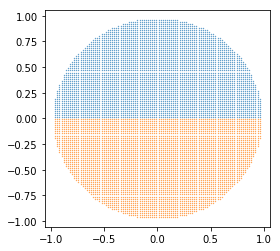

In [20]:
pDataInit = impact.readParticleData(111110,ke,mass,freq,format_id=2)
plt.figure(figsize=[4,3.6])
normalize(pDataInit)
plt.scatter(pDataInit[:,0],pDataInit[:,2],s=0.1);
plt.scatter(pDataInit[:,0],-pDataInit[:,2],s=0.1);
plt.tight_layout()

# 2. Run

In [21]:
print('===========================')
print('=========== Run ===========')
print('===========================')

=========== Run ===========


In [22]:
TBT = impact.getElem('TBT')
TBT.pID_begin = 1
TBT.pID_end   = npt
TBT.file_id = nTurn
lattice_nSC.insert(1,TBT)
lattice_wSC.insert(1,TBT)

TBT_Inv = impact.getElem('TBT_integral')
TBT_Inv.pID_begin = 1
TBT_Inv.pID_end   = npt
TBT_Inv.file_id = nTurn
TBT_Inv.betx = betx
TBT_Inv.alfx = alfx
TBT_Inv.strength_t = NL_t
TBT_Inv.transverse_scale_c = NL_c
lattice_nSC.insert(2,TBT_Inv)
lattice_wSC.insert(2,TBT_Inv)

In [23]:
if nTurn == NTURN[0]:
    lattice_nSC[0].turns = nTurn
    lattice_wSC[0].turns = nTurn
else:
    lattice_nSC[0].turns = int(nTurn/2)
    lattice_wSC[0].turns = int(nTurn/2)

        
lattice_nSC.append(impact.getElem('write_raw_ptcl'))
if nTurn == NTURN[0]:
    lattice_nSC[-1].turn = nTurn
    lattice_wSC[-1].turn = nTurn
else:
    lattice_nSC[-1].turn = int(nTurn/2)
    lattice_wSC[-1].turn = int(nTurn/2)

lattice_nSC[-1].file_id = nTurn
lattice_nSC[-1].format_id = 2

# lattice nSC

In [24]:
beam_nSC.distribution.distribution_type = 'ReadFile_binary'
if nTurn == NTURN[0]:
    beam_nSC.distribution.file_id = 111110
else:
    beam_nSC.distribution.file_id = int(nTurn/2)
impact.writeInputFile(beam_nSC,lattice_nSC,'test.in.'+str(nTurn)+'.forward') 
impact.writeInputFile(beam_nSC,lattice_nSC) 
impact.run(beam_nSC)

0

In [61]:
os.rename('lost_partcl.data','lost_partcl.'+str(nTurn)+'.data') 

FileNotFoundError: [Errno 2] No such file or directory: 'lost_partcl.data' -> 'lost_partcl.128.data'

In [62]:
indexTBT,TBTdataTmp = impact.readTBT(nTurn,ke,mass,freq)
indexTBT,TBTdataTmp_Inv = impact.readTBT_integral(nTurn)
print(TBTdataTmp.shape)
print(TBTdataTmp_Inv.shape)

(128, 6, 46)
(128, 2, 46)


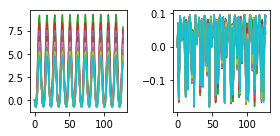

In [63]:
plt.figure(figsize=(4,2))
plt.subplot(1,2,1)
for i in range(10):
    plt.plot(TBTdataTmp_Inv[:,0,i]/TBTdataTmp_Inv[0,0,i]-1.0)
plt.subplot(1,2,2)
for i in range(10):
    plt.plot(TBTdataTmp_Inv[:,1,i]/TBTdataTmp_Inv[0,1,i]-1.0)
plt.tight_layout()

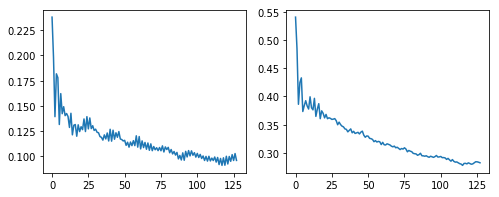

In [28]:
Inv = np.loadtxt('fort.81')
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(Inv[:,1]) 
plt.subplot(1,2,2)
plt.plot(Inv[:,2])

# lattice wSC

In [29]:
impact.writeInputFile(beam_nSC,lattice_wSC) 
impact.run(beam_nSC)

0

In [30]:
indexTBT,TBTdataTmp = impact.readTBT(nTurn,ke,mass,freq)
indexTBT,TBTdataTmp_Inv = impact.readTBT_integral(nTurn)
print(TBTdataTmp.shape)
print(TBTdataTmp_Inv.shape)

(128, 6, 3530)
(128, 2, 3530)


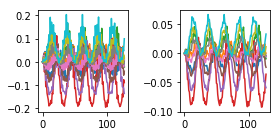

In [31]:
plt.figure(figsize=(4,2))
plt.subplot(1,2,1)
for i in range(10):
    plt.plot(TBTdataTmp_Inv[:,0,i]/TBTdataTmp_Inv[0,0,i]-1.0)
plt.subplot(1,2,2)
for i in range(10):
    plt.plot(TBTdataTmp_Inv[:,1,i]/TBTdataTmp_Inv[0,1,i]-1.0)
plt.tight_layout()

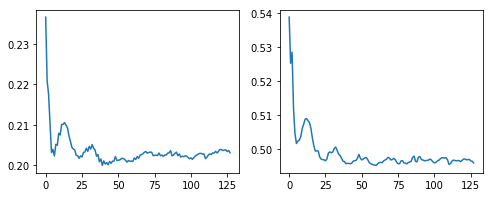

In [32]:
Inv = np.loadtxt('fort.81')
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(Inv[:,1]) 
plt.subplot(1,2,2)
plt.plot(Inv[:,2])